## Libraries

For creating this chart, we will need to load the following libraries:

- [pandas](https://python-graph-gallery.com) for data manipulation
- [matplotlib](https://python-graph-gallery.com) for creatin the chart


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import ax_text

# set a higher resolution for the plots
plt.rcParams['figure.dpi'] = 200

## Legend

In data visualization, a legend is essential as it **clarifies** the symbols, colors, and patterns used in a chart or graph. It is crucial because it enables viewers to **immediately comprehend** the presented data, ensuring both clarity and accurate interpretation.

If your chart requires significant time to understand, there is likely an **issue**!


## Default legend

The default legend in **matplotlib** is typically added using the `legend()` function. This method provides a straightforward way to include a legend in a plot, but it is not always the most effective. While the default legend is positioned in the **best location** to prevent overlapping with the plot, this might **not be optimal** for the data being displayed.

In the example below, we create two line plots:

- One with a default legend (using `ax.legend()`)
- One with a custom legend (using the [highlight_text library](/advanced-custom-annotations-matplotlib) and the `ax_text()` function)

The goal is to demonstrate that an effective legend does not require an explicit description like "this color represents this category." Instead, it should be **seamlessly integrated** into the plot, making the data **intuitive and easy to understand**.


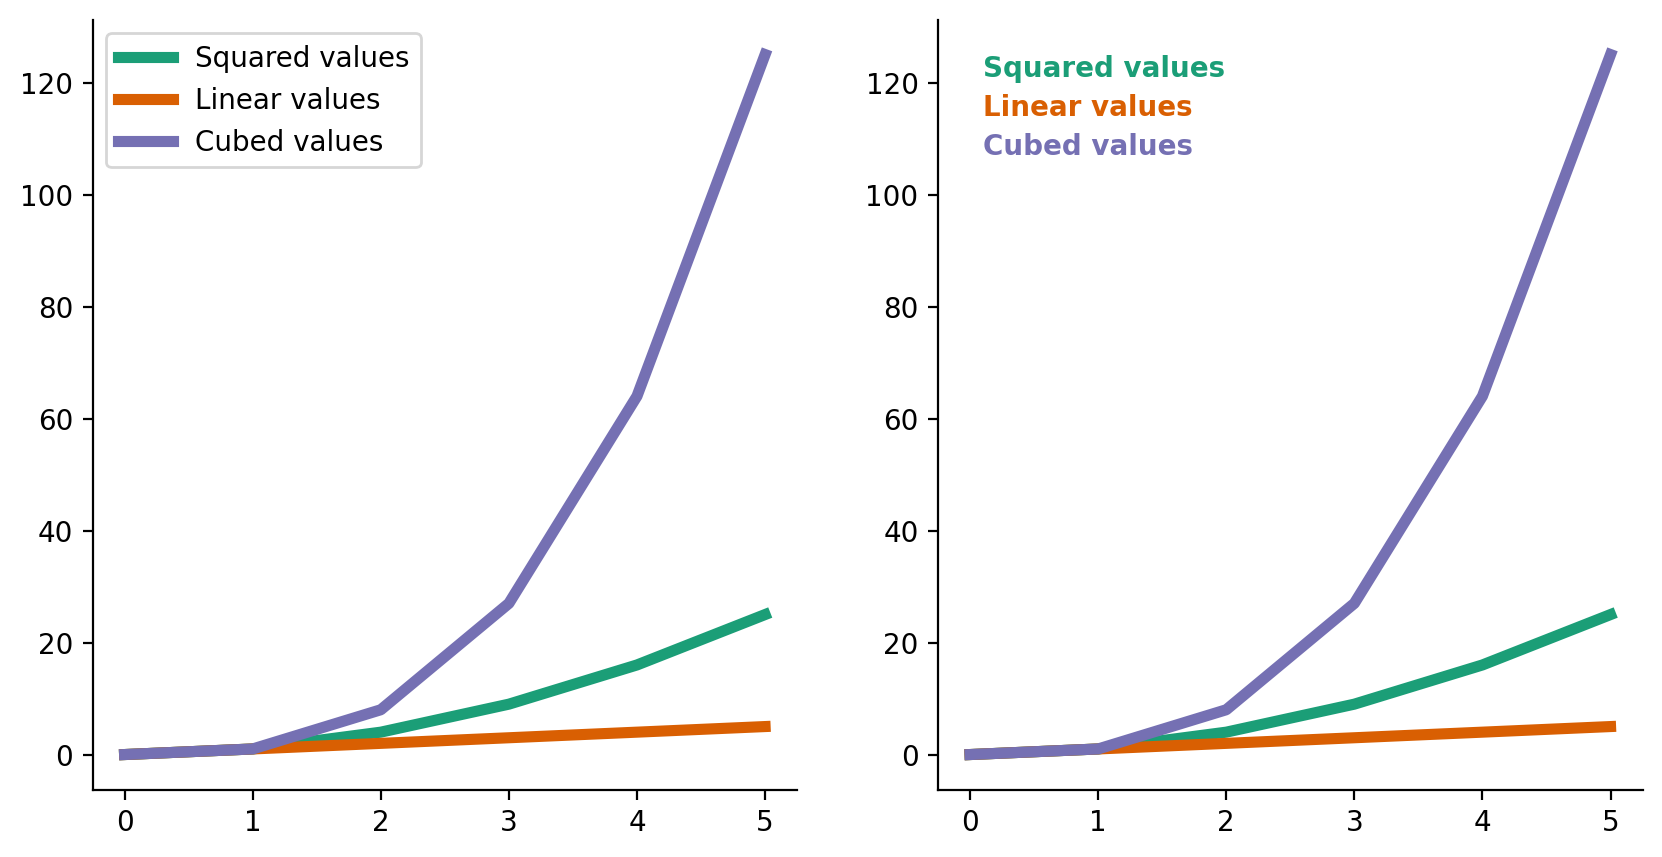

In [19]:
# Sample data
x = [0, 1, 2, 3, 4, 5]
y1 = [0, 1, 4, 9, 16, 25]
y2 = [0, 1, 2, 3, 4, 5]
y3 = [0, 1, 8, 27, 64, 125]
colors = ["#1B9E77", "#D95F02", "#7570B3"]

# Create a figure and axis
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

# Left plot
ax[0].plot(x, y1, label='Squared values', color=colors[0], linewidth=4)
ax[0].plot(x, y2, label='Linear values', color=colors[1], linewidth=4)
ax[0].plot(x, y3, label='Cubed values', color=colors[2], linewidth=4)
ax[0].spines[["top", "right"]].set_visible(False)
ax[0].legend()

# Right plot
ax[1].plot(x, y1, label='Squared values', color=colors[0], linewidth=4)
ax[1].plot(x, y2, label='Linear values', color=colors[1], linewidth=4)
ax[1].plot(x, y3, label='Cubed values', color=colors[2], linewidth=4)
ax[1].spines[["top", "right"]].set_visible(False)

# Custom legend for right plot
ax_text(
      x=0.1, y=125, ax=ax[1],
      s="<Squared values>\n<Linear values>\n<Cubed values>",
      fontsize=10, fontweight="bold",
      va="top", ha="left",
      highlight_textprops=[
         {"color": colors[0]},
         {"color": colors[1]},
         {"color": colors[2]}
      ],
)

# Show the plot
plt.show()


## Customization

Even though the `ax.legend()` function offers extensive customization (such as font, size, color, etc), it is **not always sufficient**.

On the other hand, the `ax_text()` function from the [highlight_text library](/advanced-custom-annotations-matplotlib) enables us to achieve almost **any customization** we desire, albeit with a bit more effort and code. This method is excellent for creating a **custom legend** that is seamlessly **integrated** into the plot, enhancing the **clarity** of the data being presented.

Let's explore how we can enhance our previous chart:


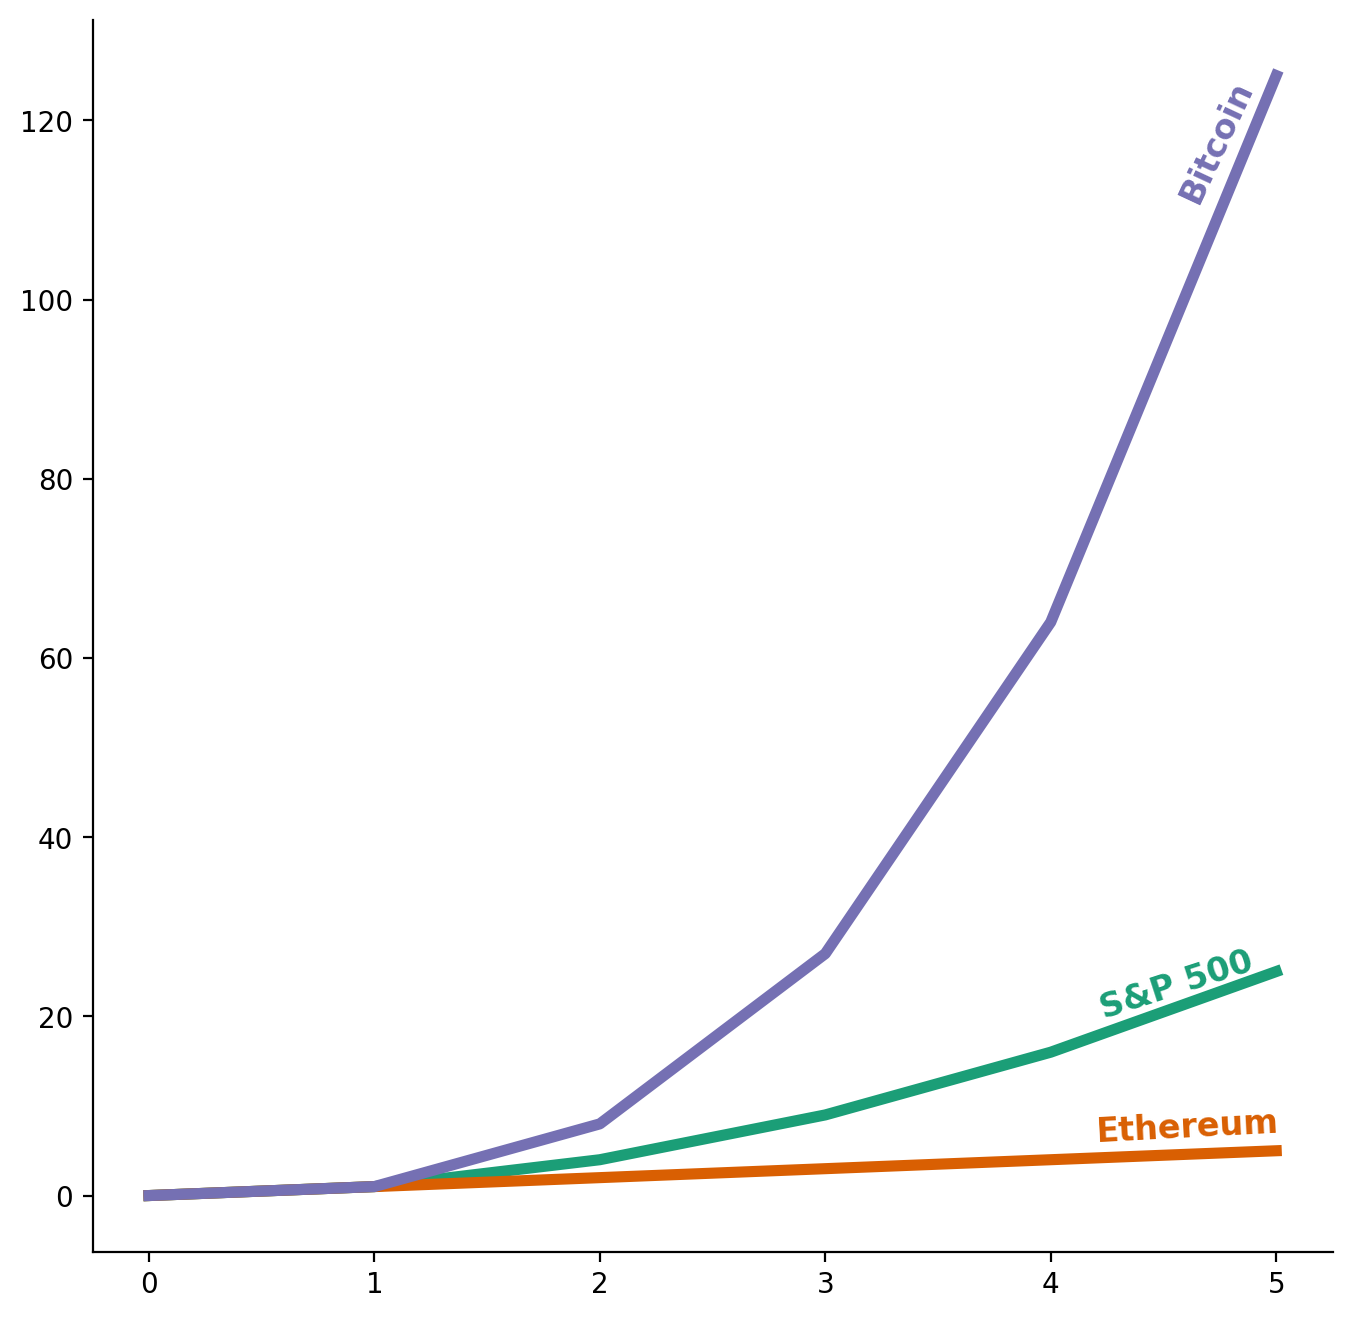

In [5]:
# Sample data
x = [0, 1, 2, 3, 4, 5]
y1 = [0, 1, 4, 9, 16, 25]
y2 = [0, 1, 2, 3, 4, 5]
y3 = [0, 1, 8, 27, 64, 125]
colors = ["#1B9E77", "#D95F02", "#7570B3"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
ax.plot(x, y1, label='Squared values', color=colors[0], linewidth=4)
ax.plot(x, y2, label='Linear values', color=colors[1], linewidth=4)
ax.plot(x, y3, label='Cubed values', color=colors[2], linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=4.55, y=125, ax=ax, s="Bitcoin", fontsize=12, fontweight="bold", va="top", ha="left", color=colors[2], rotation=65)
ax_text(x=4.2, y=10, ax=ax, s="Ethereum", fontsize=12, fontweight="bold", va="top", ha="left", color=colors[1], rotation=3)
ax_text(x=4.2, y=28, ax=ax, s="S&P 500", fontsize=12, fontweight="bold", va="top", ha="left", color=colors[0], rotation=18)

# Show the plot
plt.show()

## Legend with arrows

Another way to create a custom legend is to use **arrows** (especially curved ones). This method effectively highlights the **relationship** between elements, making the **connection** between the legend and the data clear and intuitive.

Since drawing curved arrows is **not straightforward** in [matplotlib](https://matplotlib.org), we will begin by creating a `draw_arrow()` function to facilitate this process.

This function takes a bunch of arguments, such as the `ax` object, the starting and ending points of the arrow, the curvature, and the color. It then uses the `FancyArrowPatch` class from the `matplotlib.patches` module to draw the arrow.


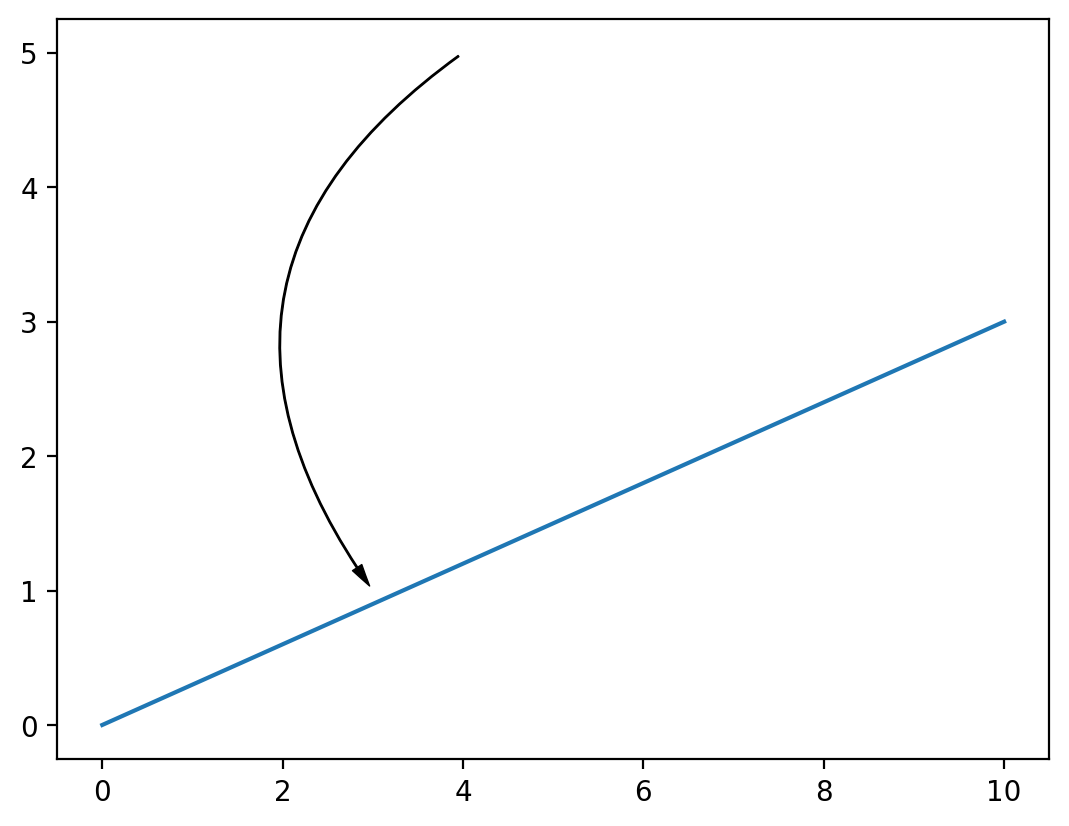

In [7]:
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt

def draw_arrow(
      ax,
      tail_position,
      head_position,
      invert=False,
      radius=0.5,
      color='black',
      lw=0.5,
      head_width=4,
      head_length=8,
      tail_width=0.5
   ):
   kw = dict(arrowstyle=f"Simple,tail_width={tail_width},head_width={head_width},head_length={head_length}", color=color, lw=lw)
   if invert:
      connectionstyle = f"arc3,rad=-{radius}"
   else:
      connectionstyle = f"arc3,rad={radius}"
   a = FancyArrowPatch(
      tail_position, head_position,
      connectionstyle=connectionstyle,
      **kw
   )
   ax.add_patch(a)

# Example usage
fig, ax = plt.subplots()
ax.plot([0, 10], [0, 3])
draw_arrow(ax, (4, 5), (3, 1))
plt.show()


Now let's use this function to create a nice legend:


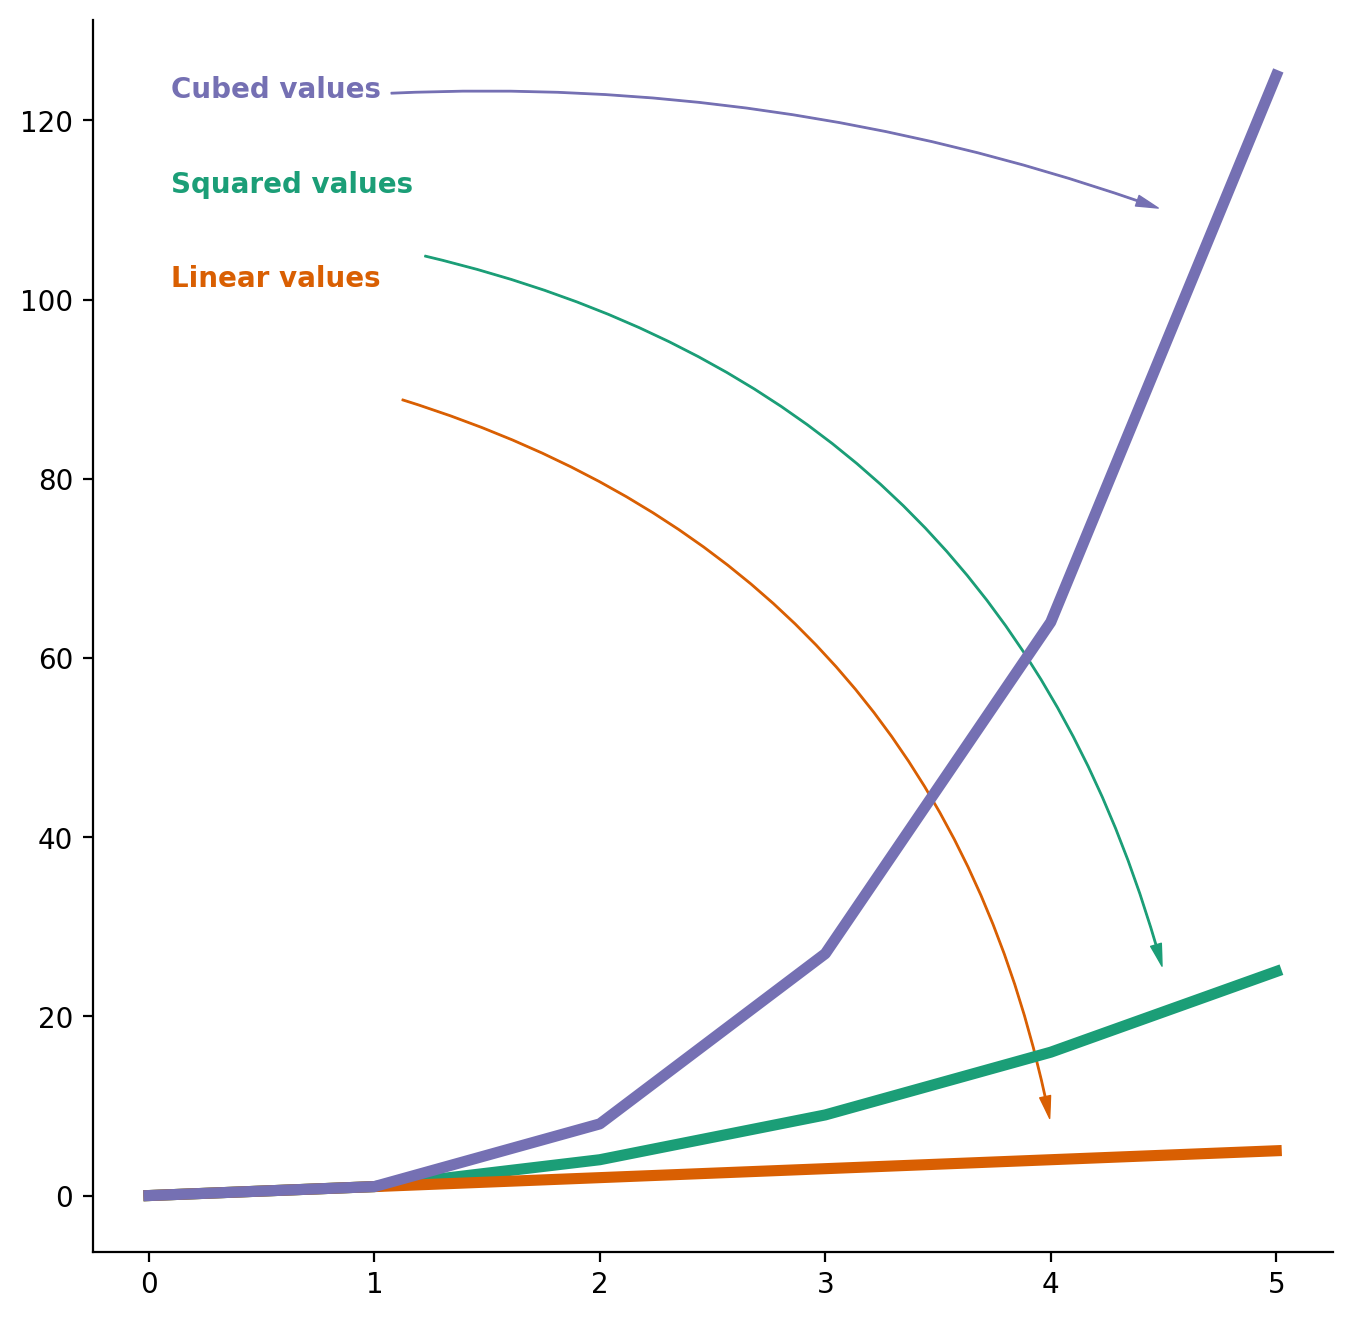

In [8]:
# Sample data
x = [0, 1, 2, 3, 4, 5]
y1 = [0, 1, 4, 9, 16, 25]
y2 = [0, 1, 2, 3, 4, 5]
y3 = [0, 1, 8, 27, 64, 125]
colors = ["#1B9E77", "#D95F02", "#7570B3"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
ax.plot(x, y1, label='Squared values', color=colors[0], linewidth=4)
ax.plot(x, y2, label='Linear values', color=colors[1], linewidth=4)
ax.plot(x, y3, label='Cubed values', color=colors[2], linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(
      x=0.1, y=125, ax=ax,
      s="<Cubed values>\n\n\n\n\n\n<Squared values>\n\n\n\n\n\n<Linear values>",
      fontsize=10, fontweight="bold",
      va="top", ha="left",
      highlight_textprops=[
         {"color": colors[2]},
         {"color": colors[0]},
         {"color": colors[1]}
      ],
)

# Draw arrows
draw_arrow(ax, (1.05, 123), (4.5, 110), invert=True, color=colors[2], radius=0.1)
draw_arrow(ax, (1.2, 105), (4.5, 25), invert=True, color=colors[0], radius=0.3)
draw_arrow(ax, (1.1, 89), (4, 8), invert=True, color=colors[1], radius=0.3)

# Show the plot
plt.show()

## Which one to choose?

There is no **one-size-fits-all** answer to this question; it depends on both the **data being presented** and the **audience**.

Additionally, some might argue that **arrows crossing the plot** are not the best choice or that the code becomes **overly complex** for delivering the same information.


## Going further

You might be interested in:

- learning more about the [highlight_text library](/advanced-custom-annotations-matplotlib)
- how to [customize titles in matplotlib](/how-to-custom-title-matplotlib)
- customize legends with [continuous color scales in matplotlib](/web-map-with-custom-legend)
- this [advanced use case](/web-map-with-custom-legend) of creating nice legends in matplotlib
